# Proyek Analisis Data: Bike Sharing
- **Nama:** Lefirsty Phricensia Gavrilla Mamahani
- **Email:** lefirstypgmamahani@gmail.com
- **ID Dicoding:** lefirstypgmamahani@gmail.com

## Menentukan Pertanyaan Bisnis

- Pengaruh musim terhadap pengguna?
- Penggunaan setiap tahun, bulan, dan jam?

## Import Semua Packages/Library yang Digunakan

In [4]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Table Day

In [5]:
# Table Day

df_day = pd.read_csv("day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Table Hour

In [6]:
# Table Hour

df_hour = pd.read_csv("hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Memeriksa Tipe Data


In [7]:
# Memeriksa Tipe Data Table Day dan Hour

df_day.info()
print("\n")
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (t

##### Missing Value

In [8]:
# Cek missing value di df_day

df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
# Cek missing value di df_hour

df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak terdapat missing value pada `df_day` maupun `df_hour`

##### Duplikasi Data

In [10]:
# Cek duplikasi data

print("Jumlah duplikasi: ", df_day.duplicated().sum())
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


Tidak terdapat duplikasi data pada tabel `df_day` maupun `df_hour`

##### Parameter Statistik

In [11]:
# Memeriksa parameter statistik dari df_day

df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
# Memeriksa parameter statistik dari df_hour

df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

### Cleaning Table `df_day`

In [13]:
# Memperbaiki tipe data

df_day["dteday"] = pd.to_datetime(df_day["dteday"])

Tipe data pada tabel `df_day` di kolom `dtebay` menjadi `datetime`

In [14]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Cleaning Table `df_hour`

In [15]:
# Memperbaiki tipe data

df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

Tipe data pada tabel `df_hour` kolom `dteday` menjadi `datetime`

In [16]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore df_day

In [17]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
465,466,2012-04-10,2,1,4,0,2,1,1,0.446667,0.436233,0.435000,0.249375,819,5099,5918
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
29,30,2011-01-30,1,0,1,0,0,0,1,0.216522,0.250322,0.722174,0.073983,140,956,1096
283,284,2011-10-11,4,0,10,0,2,1,2,0.566667,0.546096,0.808750,0.143042,667,3896,4563
312,313,2011-11-09,4,0,11,0,3,1,1,0.400000,0.409079,0.758333,0.062196,305,3804,4109


#### Denormalize

In [18]:
df_day["temp"] = df_day["temp"].multiply(41)
df_day["atemp"] = df_day["atemp"].multiply(50)
df_day["hum"] = df_day["hum"].multiply(100)
df_day["windspeed"] = df_day["windspeed"].multiply(67)

df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


Mengembalikan data asli sebelum dinormalisasi untuk dieksplor dan divisualisasi

In [19]:
df_day.loc[df_day["season"] == 1, "season"] = "Springer"
df_day.loc[df_day["season"] == 2, "season"] = "Summer"
df_day.loc[df_day["season"] == 3, "season"] = "Fall"
df_day.loc[df_day["season"] == 4, "season"] = "Winter"

df_day.season.value_counts().sort_index()

<ipython-input-19-962a174c6536>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["season"] == 1, "season"] = "Springer"


,count
season,
Fall,188
Springer,181
Summer,184
Winter,178


In [20]:
df_day.loc[df_day["yr"] == 0, "yr"] = "2011"
df_day.loc[df_day["yr"] == 1, "yr"] = "2012"

df_day.yr.value_counts().sort_index()

<ipython-input-20-f1c34e230e92>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["yr"] == 0, "yr"] = "2011"


,count
yr,
2011,365
2012,366


In [21]:
df_day.mnth.value_counts().sort_index()

,count
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


In [22]:
df_day.loc[df_day["holiday"] == 0, "holiday"] = "Holiday"
df_day.loc[df_day["holiday"] == 1, "holiday"] = "Not a Holiday"

df_day.holiday.value_counts().sort_index()

<ipython-input-22-587face4ce5d>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Holiday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["holiday"] == 0, "holiday"] = "Holiday"


,count
holiday,
Holiday,710
Not a Holiday,21


In [23]:
df_day.loc[df_day["weekday"] == 0, "weekday"] = "Sunday"
df_day.loc[df_day["weekday"] == 1, "weekday"] = "Monday"
df_day.loc[df_day["weekday"] == 2, "weekday"] = "Tuesday"
df_day.loc[df_day["weekday"] == 3, "weekday"] = "Wednesday"
df_day.loc[df_day["weekday"] == 4, "weekday"] = "Thursday"
df_day.loc[df_day["weekday"] == 5, "weekday"] = "Friday"
df_day.loc[df_day["weekday"] == 6, "weekday"] = "Saturday"

df_day.weekday.value_counts().sort_index()

<ipython-input-23-41381abf35d0>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sunday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["weekday"] == 0, "weekday"] = "Sunday"


,count
weekday,
Friday,104
Monday,105
Saturday,105
Sunday,105
Thursday,104
Tuesday,104
Wednesday,104


In [24]:
df_day.loc[df_day["workingday"] == 0, "workingday"] = "Not a Working Day"
df_day.loc[df_day["workingday"] == 1, "workingday"] = "Working Day"

df_day.workingday.value_counts().sort_index()

<ipython-input-24-4f4b2b51e3c3>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not a Working Day' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["workingday"] == 0, "workingday"] = "Not a Working Day"


,count
workingday,
Not a Working Day,231
Working Day,500


In [25]:
df_day.loc[df_day["weathersit"] == 1, "weathersit"] = "Clear"
df_day.loc[df_day["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
df_day.loc[df_day["weathersit"] == 3, "weathersit"] = "Light Snow"
df_day.loc[df_day["weathersit"] == 4, "weathersit"] = "Heavy Rain"

df_day.weathersit.value_counts().sort_index()

<ipython-input-25-365e105c1e1c>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.loc[df_day["weathersit"] == 1, "weathersit"] = "Clear"


,count
weathersit,
Clear,463
Light Snow,21
Mist + Cloudy,247


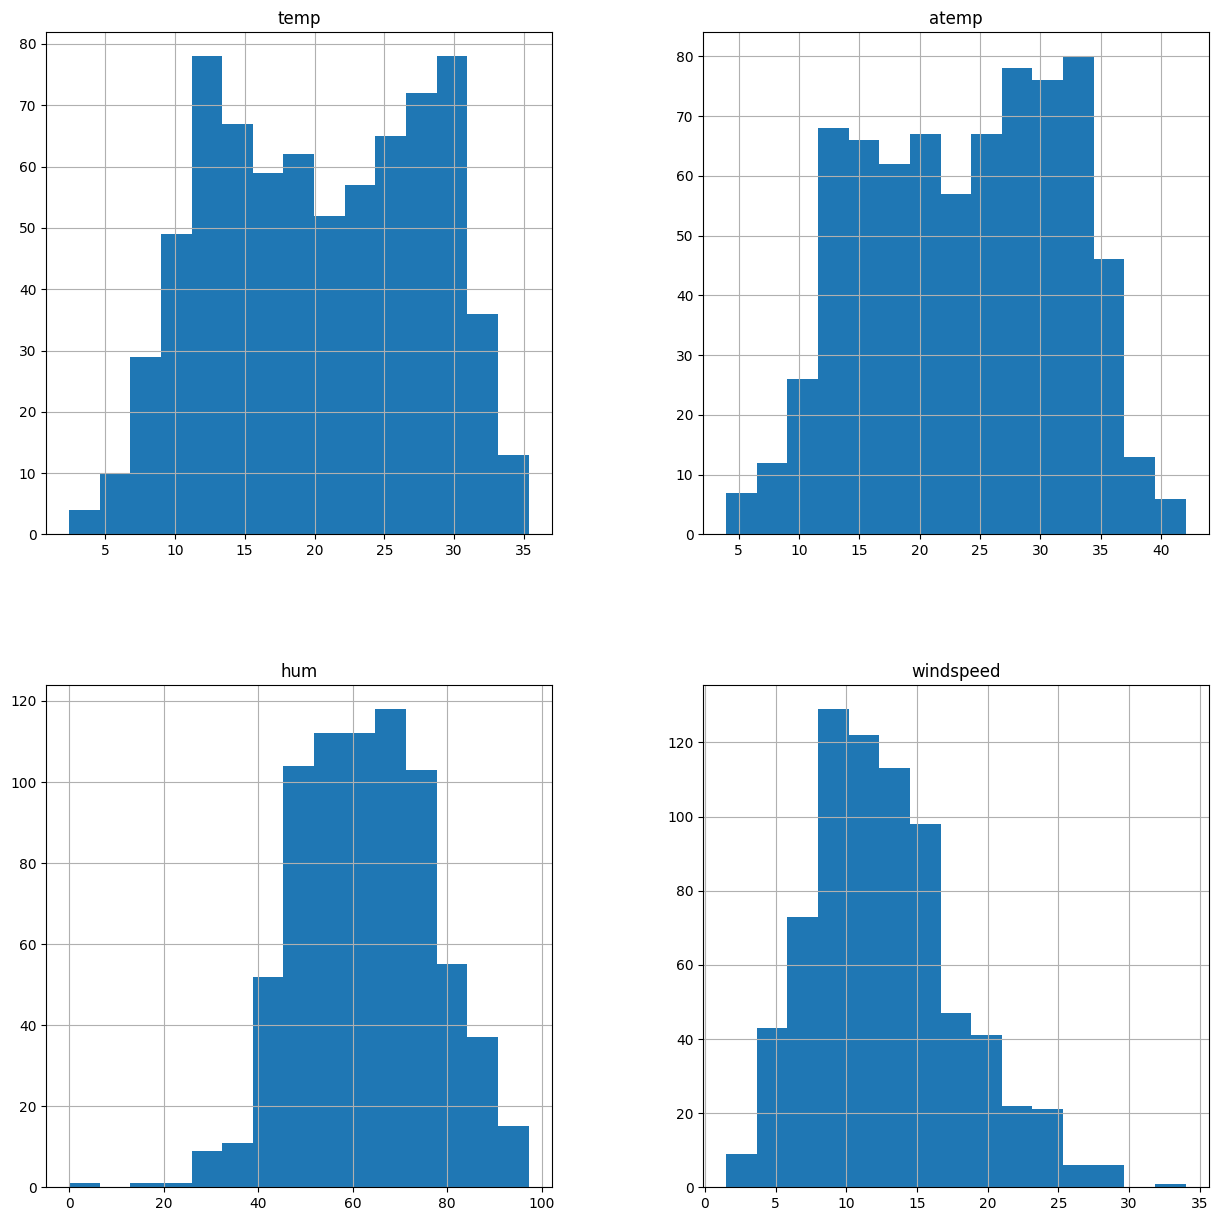

In [26]:
df_day_num = df_day[["temp", "atemp", "hum", "windspeed"]]
df_day_num.hist(bins=15, figsize=(15,15))
plt.show()

Bentuk histogram pada tabel `df_day` memberikan gambaran tentang distribusi data untuk setiap variabel numerik. Distribusi *left-skewed* pada `temp` dan `atemp` menunjukkan bahwa sebagian besar hari memiliki suhu yang relatif tinggi. Distribusi *right-skewed* pada `hum` dan `windspeed` menunjukkan bahwa sebagian besar hari memiliki tingkat kelembapan dan kecepatan angin yang relatif rendah.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

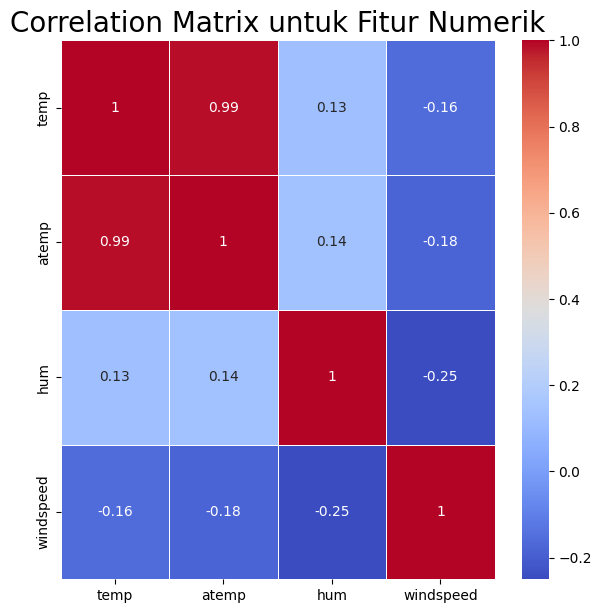

In [27]:
plt.figure(figsize = (7, 7))
correlation_matrix = df_day_num.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size = 20)

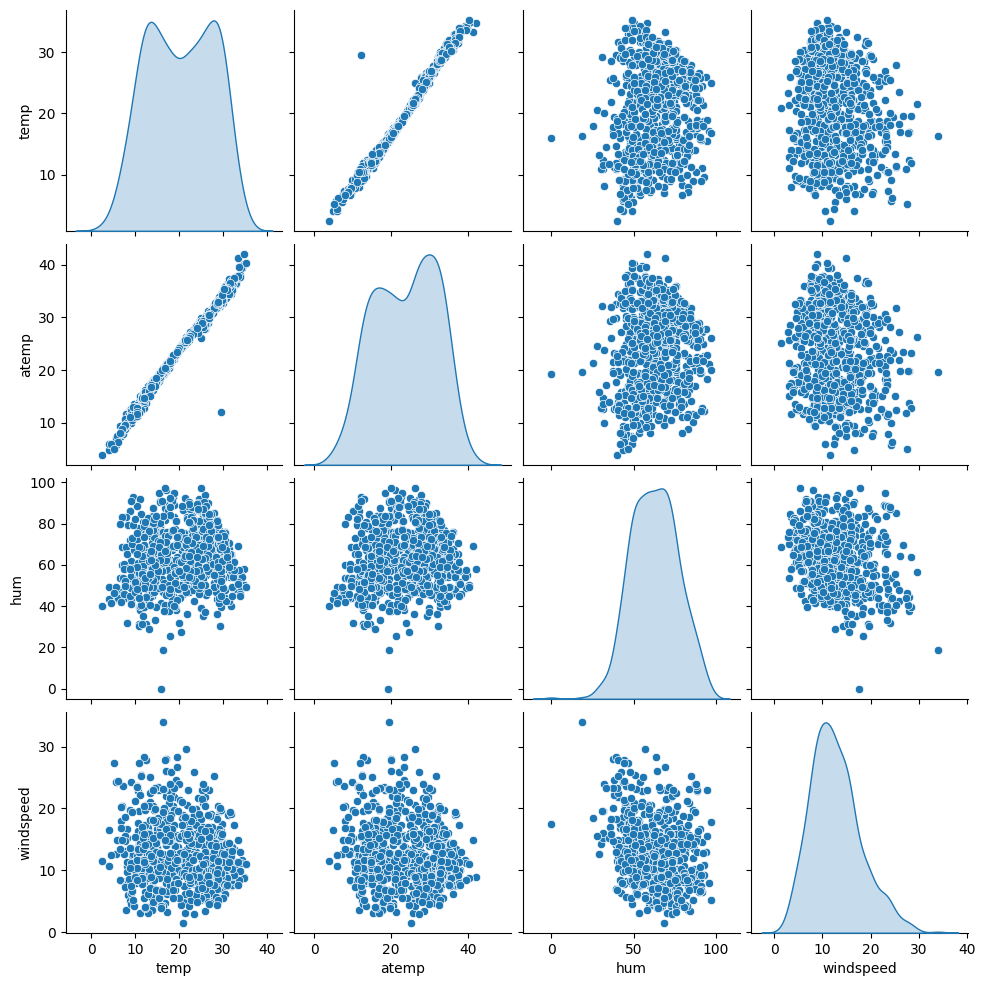

In [28]:
sns.pairplot(data=df_day_num, diag_kind="kde")

Pair plot memberikan visualisasi yang informatif tentang korelasi antar variabel numerik pada tabel `df_day`. Suhu aktual `(temp)` dan suhu "feels like" `(atemp)` memiliki korelasi yang sangat kuat, sedangkan hubungan antara variabel lainnya cenderung lemah atau berlawanan.

### Explore df_hour

In [29]:
df_hour.hr.value_counts().sort_index()

,count
hr,
0,726
1,724
2,715
3,697
4,697
5,717
6,725
7,727
8,727


In [30]:
df_hour.loc[df_hour["weathersit"] == 1, "weathersit"] = "Clear"
df_hour.loc[df_hour["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
df_hour.loc[df_hour["weathersit"] == 3, "weathersit"] = "Light Snow"
df_hour.loc[df_hour["weathersit"] == 4, "weathersit"] = "Heavy Rain"

df_hour.weathersit.value_counts().sort_index()

<ipython-input-30-02810ce145e1>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_hour.loc[df_hour["weathersit"] == 1, "weathersit"] = "Clear"


,count
weathersit,
Clear,11413
Heavy Rain,3
Light Snow,1419
Mist + Cloudy,4544


## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh musim terhadap pengguna?

In [31]:
byseason_df = df_day.groupby(by="season").instant.nunique().reset_index()
byseason_df.rename(columns={
    "instant": "sum"
}, inplace=True)
byseason_df

,season,sum
0,Fall,188
1,Springer,181
2,Summer,184
3,Winter,178


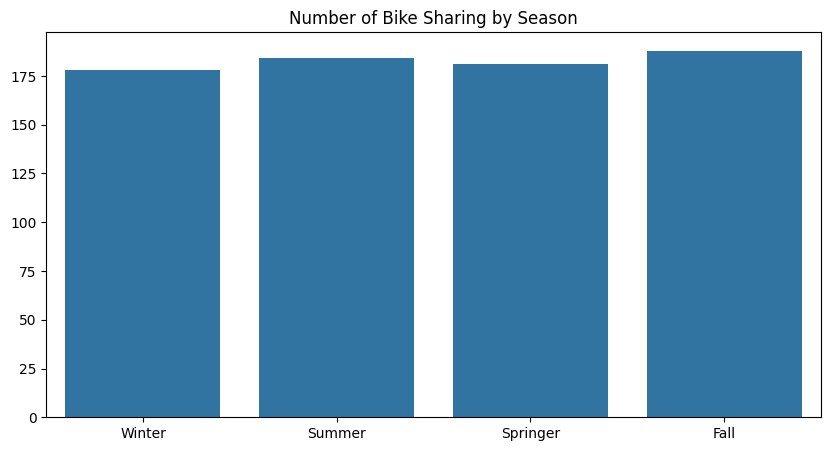

In [32]:
plt.figure(figsize=(10, 5))

sns.barplot(
    y="sum",
    x="season",
    data=byseason_df.sort_values(by="season", ascending=False),
)
plt.title("Number of Bike Sharing by Season", loc="center", fontsize=12)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=10)
plt.show()

### Pertanyaan 2: Penggunaan setiap tahun, bulan, dan jam?

#### Tahun

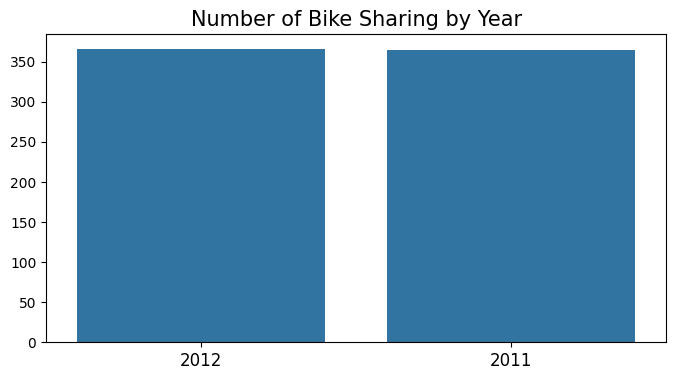

In [33]:
byyr_df = df_day.groupby(by="yr").instant.nunique().reset_index()
byyr_df.rename(columns={
    "instant": "sum"
}, inplace=True)

plt.figure(figsize=(8, 4))

sns.barplot(
    y="sum",
    x="yr",
    data=byyr_df.sort_values(by="yr", ascending=False),
)
plt.title("Number of Bike Sharing by Year", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

#### Bulan

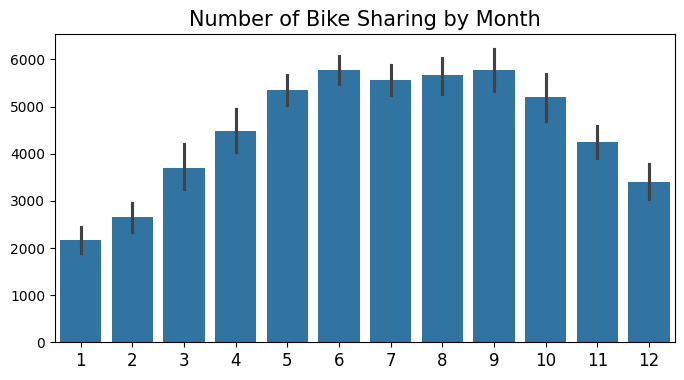

In [34]:
plt.figure(figsize=(8, 4))

sns.barplot(
    y="cnt",
    x="mnth",
    data=df_day.sort_values(by="mnth", ascending=False),
)
plt.title("Number of Bike Sharing by Month", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

#### Jam

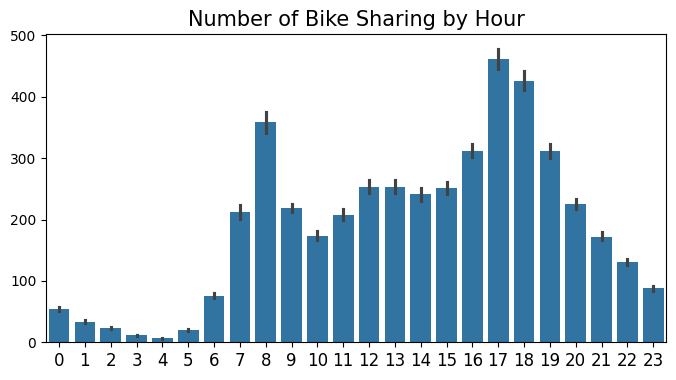

In [35]:
plt.figure(figsize=(8, 4))

sns.barplot(
    y="cnt",
    x="hr",
    data=df_hour.sort_values(by="hr", ascending=False),
)
plt.title("Number of Bike Sharing by Hour", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

## Conclusion

### Pertanyaan 1: Pengaruh musim terhadap pengguna?

Berdasarkan visualisasi data, terlihat bahwa musim **Fall** memiliki jumlah pengguna bike sharing terbanyak, diikuti oleh **Summer**, **Winter**, dan **Spring**. Hal ini menunjukkan bahwa musim Fall adalah musim yang paling diminati oleh pengguna bike sharing, sedangkan `Spring` adalah musim yang paling sepi.

### Pertanyaan 2: Penggunaan setiap tahun, bulan, dan jam?

Berdasarkan visualisasi data, berikut adalah penggunaan dalam setiap tahun, bulan, dan jam:

*   Tahun: Terjadi peningkatan jumlah pengguna bike sharing dari tahun 2011 ke tahun 2012. Hal ini menunjukkan bahwa layanan bike sharing semakin populer dari waktu ke waktu.
*   Bulan: Jumlah pengguna bike sharing cenderung meningkat pada bulan-bulan musim panas seperti Juni, Juli, dan Agustus, dan menurun pada bulan-bulan musim dingin seperti Desember, Januari, dan Februari.
*   Jam: Jumlah pengguna bike sharing cenderung tinggi pada jam-jam sibuk, seperti jam berangkat dan pulang kerja (jam 7-9 pagi dan 5-7 sore).




## Export Dataset

In [37]:
all_df = pd.concat([df_day, df_hour], ignore_index=True)

all_df.to_csv("all_data.csv", index=False)

In [38]:
df = pd.read_csv("all_data.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,Springer,2011,1,Holiday,Saturday,Not a Working Day,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,NaN
1,2,2011-01-02,Springer,2011,1,Holiday,Sunday,Not a Working Day,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,NaN
2,3,2011-01-03,Springer,2011,1,Holiday,Monday,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,NaN
3,4,2011-01-04,Springer,2011,1,Holiday,Tuesday,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,NaN
4,5,2011-01-05,Springer,2011,1,Holiday,Wednesday,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,NaN
